In [144]:
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [401]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


print('Libraries imported.')

Libraries imported.


In [146]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [147]:
data[0]


Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
5           M6A        North York   
6           M7A  Downtown Toronto   
7           M8A      Not assigned   
8           M9A         Etobicoke   
9           M1B       Scarborough   
10          M2B      Not assigned   
11          M3B        North York   
12          M4B         East York   
13          M5B  Downtown Toronto   
14          M6B        North York   
15          M7B      Not assigned   
16          M8B      Not assigned   
17          M9B         Etobicoke   
18          M1C       Scarborough   
19          M2C      Not assigned   
20          M3C        North York   
21          M4C         East York   
22          M5C  Downtown Toronto   
23          M6C              York   
24          M7C      Not assigned   
25          M8C      Not assigned   
26          M9C         Etobicoke   
27          M1E       Scarborough   
28          M2E      Not assigned   
29          M3E      Not assigned   
30          M4E      East Toronto   
31          M5E  Downtown Toronto   
32          M6E              York   
33          M7E      Not assigned   
34          M8E      Not assigned   
35          M9E      Not assigned   
36          M1G       Scarborough   
37          M2G      Not assigned   
38          M3G      Not assigned   
39          M4G         East York   
40          M5G  Downtown Toronto   
41          M6G  Downtown Toronto   
42          M7G      Not assigned   
43          M8G      Not assigned   
44          M9G      Not assigned   
45          M1H       Scarborough   
46          M2H        North York   
47          M3H        North York   
48          M4H         East York   
49          M5H  Downtown Toronto   
50          M6H      West Toronto   
51          M7H      Not assigned   
52          M8H      Not assigned   
53          M9H      Not assigned   
54          M1J       Scarborough   
55          M2J        North York   
56          M3J        North York   
57          M4J         East York   
58          M5J  Downtown Toronto   
59          M6J      West Toronto   
60          M7J      Not assigned   
61          M8J      Not assigned   
62          M9J      Not assigned   
63          M1K       Scarborough   
64          M2K        North York   
65          M3K        North York   
66          M4K      East Toronto   
67          M5K  Downtown Toronto   
68          M6K      West Toronto   
69          M7K      Not assigned   
70          M8K      Not assigned   
71          M9K      Not assigned   
72          M1L       Scarborough   
73          M2L        North York   
74          M3L        North York   
75          M4L      East Toronto   
76          M5L  Downtown Toronto   
77          M6L        North York   
78          M7L      Not assigned   
79          M8L      Not assigned   
80          M9L        North York   
81          M1M       Scarborough   
82          M2M        North York   
83          M3M        North York   
84          M4M      East Toronto   
85          M5M        North York   
86          M6M              York   
87          M7M      Not assigned   
88          M8M      Not assigned   
89          M9M        North York   
90          M1N       Scarborough   
91          M2N        North York   
92          M3N        North York   
93          M4N   Central Toronto   
94          M5N   Central Toronto   
95          M6N              York   
96          M7N      Not assigned   
97          M8N      Not assigned   
98          M9N              York   
99          M1P       Scarborough   
100         M2P        North York   
101         M3P      Not assigned   
102         M4P   Central Toronto   
103         M5P   Central Toronto   
104         M6P      West Toronto   
105         M7P      Not assigned   
106         M8P      Not assigned   
107     

In [148]:
df=pd.DataFrame(data[0])
df.shape

(180, 3)

In [149]:
df.drop(df[df['Borough'] == 'Not assigned'].index, inplace = True) 

In [150]:
df.shape

(103, 3)

In [151]:
# To check for any repeative terms in Postal Code
df['Postal Code'].nunique()
#As the number of rows and unique terms are equal .we can confirm that there is no repeative terms

103

In [152]:
# To check 'Not assigned ' term in Neighbourhood
df[df['Neighborhood'] == 'Not assigned'].count()

Postal Code     0
Borough         0
Neighborhood    0
dtype: int64

The column Neighborhood is clean.

In [153]:
df.shape

(103, 3)

In [154]:
# Sorting the table in ascending order b the column 'Postal Code'

df.sort_values(by ='Postal Code' ,ascending = True,inplace = True)
df.head()

Postal Code      Borough                            Neighborhood
9          M1B  Scarborough                          Malvern, Rouge
18         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
27         M1E  Scarborough       Guildwood, Morningside, West Hill
36         M1G  Scarborough                                  Woburn
45         M1H  Scarborough                               Cedarbrae

In [155]:
# Rearanging the index

df.reset_index(drop =True , inplace =True)
df.head()

Postal Code      Borough                            Neighborhood
0         M1B  Scarborough                          Malvern, Rouge
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
2         M1E  Scarborough       Guildwood, Morningside, West Hill
3         M1G  Scarborough                                  Woburn
4         M1H  Scarborough                               Cedarbrae

In [135]:
#getting the cordinates of neighbourhood locations

data_coordinates=pd.read_csv('Geospatial_Coordinates.csv')
df_coordinates=pd.DataFrame(data_coordinates)
df_coordinates.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [174]:
# Merging dataframes df and df_coordinates

df =df.merge(df_coordinates)

In [175]:
df.head()

Postal Code      Borough                            Neighborhood   Latitude  \
0         M1B  Scarborough                          Malvern, Rouge  43.806686   
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2         M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3         M1G  Scarborough                                  Woburn  43.770992   
4         M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [163]:
# Getting the coordinaes of Toronto,Ontario
# Use geopy library Model Nominatim

address = "Toronto,Ontario"
locator = Nominatim(user_agent="myGeocoder")
location = locator.geocode(address)
latitude=location.latitude
longitude = location.longitude

In [182]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.45)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'],df['Longitude'],df['Borough'],df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [195]:
# Gathering all the borough

Borough = df['Borough'].unique()
list(Borough)

['Scarborough',
 'North York',
 'East York',
 'East Toronto',
 'Central Toronto',
 'Downtown Toronto',
 'York',
 'West Toronto',
 'Mississauga',
 'Etobicoke']

In [197]:
#To collect all the neghborhood of belonging to to particular borough in diffrent dataframe.

df_Scarborough= df[df['Borough']== Borough[0]]
df_NorthYork = df[df['Borough']== Borough[1]]
df_EastYork=df[df['Borough']== Borough[2]]
df_EastToronto=df[df['Borough']== Borough[3]]
df_CentralToronto=df[df['Borough']== Borough[4]]
df_York=df[df['Borough']== Borough[5]]
df_WestToronto=df[df['Borough']== Borough[6]]
df_Mississauga=df[df['Borough']== Borough[7]]
df_Etobicoke=df[df['Borough']== Borough[8]]

Postal Code      Borough  \
0          M1B  Scarborough   
1          M1C  Scarborough   
2          M1E  Scarborough   
3          M1G  Scarborough   
4          M1H  Scarborough   
5          M1J  Scarborough   
6          M1K  Scarborough   
7          M1L  Scarborough   
8          M1M  Scarborough   
9          M1N  Scarborough   
10         M1P  Scarborough   
11         M1R  Scarborough   
12         M1S  Scarborough   
13         M1T  Scarborough   
14         M1V  Scarborough   
15         M1W  Scarborough   
16         M1X  Scarborough   

                                         Neighborhood   Latitude  Longitude  
0                                      Malvern, Rouge  43.806686 -79.194353  
1              Rouge Hill, Port Union, Highland Creek  43.784535 -79.160497  
2                   Guildwood, Morningside, West Hill  43.763573 -79.188711  
3                                              Woburn  43.770992 -79.216917  
4                                           Cedarbrae  43.773136 -79.239476  
5                                 Scarborough Village  43.744734 -79.239476  
6         Kennedy Park, Ionview, East Birchmount Park  43.727929 -79.262029  
7                     Golden Mile, Clairlea, Oakridge  43.711112 -79.284577  
8     Cliffside, Cliffcrest, Scarborough Village West  43.716316 -79.239476  
9                         Birch Cliff, Cliffside West  43.692657 -79.264848  
10  Dorset Park, Wexford Heights, Scarborough Town...  43.757410 -79.273304  
11                                  Wexford, Maryvale  43.750072 -79.295849  
12                                          Agincourt  43.794200 -79.262029  
13            Clarks Corners, Tam O'Shanter, Sullivan  43.781638 -79.304302  
14  Milliken, Agincourt North, Steeles East, L'Amo...  43.815252 -79.284577  
15                      Steeles West, L'Amoreaux West  43.799525 -79.318389  
16                                        Upper Rouge  43.836125 -79.205636

# Note
As we can see ,in some instance of neghbourhood  we have more than one names . So, I am getting all the neighborshoods name under one list

In [239]:
list_neighbourhood=list(df['Neighborhood'])
new_neighborhood_list=[]
for i in list_neighbourhood:
    new_neighborhood_list.append(i.split(","))

In [249]:
# Converting Nested list to  dimension list
neighborhood = [item for sublist in new_neighborhood_list for item in sublist]
print(len(neighborhood))

217


### Getting Latitude and Longitude of all neighborhood
Some of the places information is found .So I have negelected the neighbourhood.

In [290]:
latitude_list =[]
longitude_list =[]
neighborhood_list=[]
for index,place in enumerate(neighborhood):  
    address = "{},Toronto,Ontario".format(place)
    locator = Nominatim(user_agent="myGeocoder")
    location = locator.geocode(address)
    #To check for **None** type
    if(locator.geocode(address) != None):
        print(index,",",place," ",location.latitude," ",location.longitude)
        neighborhood_list.append(place)
        latitude_list.append(location.latitude)
        longitude_list.append(location.longitude)

0 , Malvern   43.8091955   -79.2217008
1 ,  Rouge   43.8049304   -79.1658374
2 , Rouge Hill   43.7802711   -79.1304992
3 ,  Port Union   43.7755039   -79.1349765
4 ,  Highland Creek   43.7901172   -79.1733344
5 , Guildwood   43.7552251   -79.1982293
6 ,  Morningside   43.7826012   -79.2049579
7 ,  West Hill   43.7689144   -79.1872905
8 , Woburn   43.7598243   -79.2252908
9 , Cedarbrae   43.75646655   -79.22669244258802
10 , Scarborough Village   43.7437422   -79.2116324
11 , Kennedy Park   43.724878   -79.2539688
12 ,  Ionview   43.7359904   -79.2765146
13 ,  East Birchmount Park   43.7141672   -79.271109
14 , Golden Mile   43.7278414   -79.2876217
15 ,  Clairlea   43.7088231   -79.2959856
16 ,  Oakridge   43.6971738   -79.2748232
17 , Cliffside   43.7111699   -79.2481769
18 ,  Cliffcrest   43.7218363   -79.2362138
19 ,  Scarborough Village West   43.7437422   -79.2116324
20 , Birch Cliff   43.6918051   -79.2644935
21 ,  Cliffside West   43.7111699   -79.2481769
22 , Dorset Park   43.7

185 ,  Kingsway Park South West   43.6473811   -79.5113328
186 ,  Royal York South West   43.6481827   -79.5112961
187 , Islington Avenue   43.6794838   -79.5389092
188 ,  Humber Valley Village   43.6664717   -79.5243136
189 , West Deane Park   43.6631995   -79.5685684
190 ,  Princess Gardens   43.6404664   -79.3912237
191 ,  Martin Grove   43.6449033   -79.3818364
192 ,  Islington   43.645335   -79.5248163
193 ,  Cloverdale   43.633637   -79.5497447
194 , Eringate   43.6622732   -79.5765162
195 ,  Bloordale Gardens   43.6353169   -79.5636744
196 ,  Old Burnhamthorpe   43.6393732   -79.5843869
197 ,  Markland Wood   43.63123865   -79.58543401986114
198 , Humber Summit   43.7600778   -79.5717598
199 , Humberlea   43.7213166   -79.5331605
200 ,  Emery   43.7520744   -79.5423657
201 , Weston   43.7001608   -79.5162474
202 , Westmount   43.6936399   -79.5210426
203 , Kingsview Village   43.6995391   -79.5563459
204 ,  St. Phillips   43.7000483   -79.5437651
205 ,  Martin Grove Gardens   43

In [291]:
# Converting neighborhood names with latitude and longitudes to Dataframe
toronto_df =pd.DataFrame({'Neighborhood':neighborhood_list})
toronto_df['Latitude']=latitude_list
toronto_df['Longitude']=longitude_list
toronto_df.head()

Neighborhood   Latitude  Longitude
0          Malvern  43.809196 -79.221701
1            Rouge  43.804930 -79.165837
2       Rouge Hill  43.780271 -79.130499
3       Port Union  43.775504 -79.134976
4   Highland Creek  43.790117 -79.173334

In [292]:
toronto_df.shape

(203, 3)

In [306]:
#Drop duplicate values and rearrange the index
toronto_df.drop_duplicates(subset='Neighborhood',inplace = True)
toronto_df.reset_index()
toronto_df.head()

Neighborhood   Latitude  Longitude
0          Malvern  43.809196 -79.221701
1            Rouge  43.804930 -79.165837
2       Rouge Hill  43.780271 -79.130499
3       Port Union  43.775504 -79.134976
4   Highland Creek  43.790117 -79.173334

In [158]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'D5EIYSNTRMPI3UEYHSYZZ4B35MPON4UG4HSUM3WHRIPPHWT4' # your Foursquare ID
CLIENT_SECRET = 'WA3HMJMEPC1FWPFIULGMVMG1523KUYINENCZUQSFRBY0UY5V' # your FoursquarWA3HMJMEPC1FWPFIULGMVMG1523KUYINENCZUQSFRBY0UY5Ve Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: D5EIYSNTRMPI3UEYHSYZZ4B35MPON4UG4HSUM3WHRIPPHWT4
CLIENT_SECRET:WA3HMJMEPC1FWPFIULGMVMG1523KUYINENCZUQSFRBY0UY5V


#### Now, let's get the top 100 venues that are in the neighborhoods of Toronto within a radius of 500 meters.

In [206]:
# Function to retrive venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [309]:
toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

Malvern
 Rouge
Rouge Hill
 Port Union
 Highland Creek
Guildwood
 Morningside
 West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park
 Ionview
 East Birchmount Park
Golden Mile
 Clairlea
 Oakridge
Cliffside
 Cliffcrest
 Scarborough Village West
Birch Cliff
 Cliffside West
Dorset Park
 Wexford Heights
 Scarborough Town Centre
Wexford
 Maryvale
Agincourt
Clarks Corners
 Tam O'Shanter
 Sullivan
Milliken
 Agincourt North
 Steeles East
 L'Amoreaux East
Steeles West
 L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview
 Henry Farm
 Oriole
Bayview Village
York Mills
 Silver Hills
Willowdale
 Newtonbrook
 Willowdale East
York Mills West
 Willowdale West
Parkwoods
Don Mills
Bathurst Manor
 Wilson Heights
 Downsview North
Northwood Park
 York University
Downsview
Victoria Village
Parkview Hill
 Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
 Broadview North (Old East York)
The Danforth West
 Riverdale
India Bazaar
 The Beaches West
Studio District
Lawre

In [310]:
print(toronto_venues.shape)
toronto_venues.head()

(5750, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      Malvern              43.809196              -79.221701   
1      Malvern              43.809196              -79.221701   
2      Malvern              43.809196              -79.221701   
3      Malvern              43.809196              -79.221701   
4      Malvern              43.809196              -79.221701   

                Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Shoppers Drug Mart       43.809610       -79.222729        Pharmacy  
1              Subway       43.806961       -79.221476  Sandwich Place  
2           Pizza Hut       43.808326       -79.220616     Pizza Place  
3       Malvern Arena       43.808594       -79.216634    Skating Rink  
4         Pizza Pizza       43.806613       -79.221243     Pizza Place

Let's check how many venues were returned for each neighborhood

In [311]:
toronto_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                              
 Adelaide                                           100   
 Agincourt North                                     26   
 Albion Gardens                                      10   
 Bathurst Quay                                       24   
 Bloordale Gardens                                    9   
 Broadview North (Old East York)                      9   
 Cabbagetown                                         47   
 Chinatown                                           64   
 Clairlea                                            11   
 Cliffcrest                                           5   
 Cliffside West                                       7   
 Cloverdale                                          23   
 Deer Park                                           61   
 Design Exchange                                    100   
 Dovercourt Village                                   7   
 Downsview North                                      8   
 East Birchmount Park                                 4   
 Emery                                                8   
 Exhibition Place                                    40   
 Forest Hill Road Park                                9   
 Forest Hill SE                                       4   
 Grange Park                                        100   
 Harbord                                             71   
 Harbourfront                                       100   
 Harbourfront West                                  100   
 Henry Farm                                           3   
 Highland Creek                                       3   
 Humber Bay                                           3   
 Humber Valley Village                                5   
 Humbergate                                           8   
 Ionview                                              4   
 Island airport                                      14   
 Islington                                           26   
 Jamestown                                           77   
 King                                               100   
 King and Spadina                                    74   
 King's Mill Park                                     8   
 Kingsway Park South East                            35   
 Kingsway Park South West                            35   
 L'Amoreaux East                                      6   
 L'Amoreaux West                                      6   
 Lawrence Heights                                    91   
 Lawrence Manor East                                  5   
 Lawrence Park                                       49   
 Long Branch                                         10   
 Maple Leaf Park                                      4   
 Markland Wood                                        4   
 Martin Grove                                        78   
 Martin Grove Gardens                                 4   
 Maryvale                                            21   
 Mimico NE                                            4   
 Mimico South                                         4   
 Montgomery Road                                     18   
 Morningside                                         13   
 Mount Dennis                                         9   
 Mount Olive                                         77   
 Newtonbrook                                         37   
 North Midtown                                       72   
 Oakridge                                             6   
 Old Burnhamthorpe                                    5   
 Old Mill North                                       8   
 Oriole                                              10   
 Parkdale Village                                    44   
 Port Union                                           2   
 Princess Gardens                                    87   
 Rathnelly                                           20   
 Richview Gardens     

### Analysing the neighbourhoods

In [312]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

Yoga Studio  Accessories Store  Afghan Restaurant  African Restaurant  \
0            0                  0                  0                   0   
1            0                  0                  0                   0   
2            0                  0                  0                   0   
3            0                  0                  0                   0   
4            0                  0                  0                   0   

   Airport  Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0        0                   0             0               0                0   
1        0                   0             0               0                0   
2        0                   0             0               0                0   
3        0                   0             0               0                0   
4        0                   0             0               0                0   

   Airport Terminal  American Restaurant  Animal Shelter  Antique Shop  \
0                 0                    0               0             0   
1                 0                    0               0             0   
2                 0                    0               0             0   
3                 0                    0               0             0   
4                 0                    0               0             0   

   Aquarium  Argentinian Restaurant  Art Gallery  Art Museum  \
0         0                       0            0           0   
1         0                       0            0           0   
2         0                       0            0           0   
3         0                       0            0           0   
4         0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  Auto Dealership  Automotive Shop  BBQ Joint  \
0                   0                0                0          0   
1                   0                0                0          0   
2                   0                0                0          0   
3                   0                0                0          0   
4                   0                0                0          0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Stadium  Beach  Beach Bar  Bed & Breakfast  Beer Bar  \
0                   0      0          0                0         0   
1                   0      0          0                0         0   
2                   0      0          0                0         0   
3                   0      0          0                0         0   
4                   0      0          0                0         0   

   Beer Store  Belgian Restaurant  Big Box Store  Bike Shop  Bike Trail  \
0           0                   0              0          0           0   
1           0                   0              0          0           0   
2           0                   0              0          0           0   
3           0                   0              0          0           0   
4           0                   0              0          0           0   

   Bistro  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0       0              0          0         0         

In [313]:
toronto_onehot.shape

(5750, 336)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [314]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Yoga Studio  Accessories Store  \
0                            Adelaide     0.000000           0.000000   
1                     Agincourt North     0.000000           0.000000   
2                      Albion Gardens     0.000000           0.000000   
3                       Bathurst Quay     0.000000           0.000000   
4                   Bloordale Gardens     0.000000           0.000000   
5     Broadview North (Old East York)     0.000000           0.000000   
6                         Cabbagetown     0.000000           0.000000   
7                           Chinatown     0.000000           0.000000   
8                            Clairlea     0.000000           0.000000   
9                          Cliffcrest     0.000000           0.000000   
10                     Cliffside West     0.000000           0.000000   
11                         Cloverdale     0.000000           0.000000   
12                          Deer Park     0.016393           0.000000   
13                    Design Exchange     0.000000           0.000000   
14                 Dovercourt Village     0.000000           0.000000   
15                    Downsview North     0.000000           0.000000   
16               East Birchmount Park     0.000000           0.000000   
17                              Emery     0.000000           0.000000   
18                   Exhibition Place     0.000000           0.000000   
19              Forest Hill Road Park     0.000000           0.000000   
20                     Forest Hill SE     0.000000           0.000000   
21                        Grange Park     0.010000           0.000000   
22                            Harbord     0.000000           0.000000   
23                       Harbourfront     0.000000           0.000000   
24                  Harbourfront West     0.000000           0.000000   
25                         Henry Farm     0.000000           0.000000   
26                     Highland Creek     0.000000           0.000000   
27                         Humber Bay     0.000000           0.000000   
28              Humber Valley Village     0.000000           0.000000   
29                         Humbergate     0.000000           0.000000   
30                            Ionview     0.000000           0.000000   
31                     Island airport     0.000000           0.000000   
32                          Islington     0.000000           0.000000   
33                          Jamestown     0.000000           0.000000   
34                               King     0.010000           0.000000   
35                   King and Spadina     0.027027           0.000000   
36                   King's Mill Park     0.000000           0.000000   
37           Kingsway Park South East     0.000000           0.000000   
38           Kingsway Park South West     0.000000           0.000000   
39                    L'Amoreaux East     0.000000           0.000000   
40                    L'Amoreaux West     0.000000           0.000000   
41                   Lawrence Heights     0.000000           0.021978   
42                Lawrence Manor East     0.000000           0.000000   
43                      Lawrence Park     0.000000           0.000000   
44                        Long Branch     0.000000           0.000000   
45                    Maple Leaf Park     0.000000           0.000000   
46                      Markland Wood     0.000000           0.000000   
47                       Martin Grove     0.000000           0.000000   
48               Martin Grove Gardens     0.000000           0.000000   
49                           Maryvale     0.000000           0.000000   
50                          Mimico NE     0.000000           0.000000   
51                       Mimico South     0.000000           0.000000   
52                    Montgomery Road     0.000000           0.000000   
53                        Morningside     0.000000           0.000000   
54        

In [315]:
toronto_grouped.shape

(194, 336)

#### Let's print each neighborhood along with the top 5 most common venues

In [316]:
num_top_venues
for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Adelaide----
         venue  freq
0  Coffee Shop  0.07
1          Gym  0.05
2         Café  0.05
3   Restaurant  0.05
4    Gastropub  0.04


---- Agincourt North----
                venue  freq
0              Bakery  0.08
1  Chinese Restaurant  0.08
2                Bank  0.08
3          Restaurant  0.04
4       Movie Theater  0.04


---- Albion Gardens----
                  venue  freq
0         Grocery Store   0.2
1              Pharmacy   0.1
2        Sandwich Place   0.1
3        Hardware Store   0.1
4  Fast Food Restaurant   0.1


---- Bathurst Quay----
         venue  freq
0  Coffee Shop  0.17
1         Café  0.12
2         Park  0.08
3       Tunnel  0.04
4        Diner  0.04


---- Bloordale Gardens----
               venue  freq
0  Convenience Store  0.22
1      Deli / Bodega  0.11
2               Bank  0.11
3         Donut Shop  0.11
4     Shipping Store  0.11


---- Broadview North (Old East York)----
                  venue  freq
0        Ice Cream Shop  0.11
1         

            venue  freq
0     Golf Course  0.25
1  Baseball Field  0.25
2       Piano Bar  0.25
3            Park  0.25
4     Yoga Studio  0.00


---- Martin Grove----
           venue  freq
0    Coffee Shop  0.13
1          Hotel  0.06
2           Café  0.05
3  Deli / Bodega  0.04
4   Concert Hall  0.03


---- Martin Grove Gardens----
                 venue  freq
0         Liquor Store  0.25
1             Pharmacy  0.25
2          Coffee Shop  0.25
3  American Restaurant  0.25
4          Yoga Studio  0.00


---- Maryvale----
                           venue  freq
0                    Coffee Shop  0.10
1                    Gas Station  0.05
2  Paper / Office Supplies Store  0.05
3                       Bus Line  0.05
4                 Breakfast Spot  0.05


---- Mimico NE----
          venue  freq
0    Playground  0.25
1        Bakery  0.25
2           Bar  0.25
3  Skating Rink  0.25
4   Yoga Studio  0.00


---- Mimico South----
          venue  freq
0    Playground  0.25
1        Bake

4      Yoga Studio  0.00


---- Trinity----
            venue  freq
0            Café  0.07
1     Coffee Shop  0.07
2        Boutique  0.05
3  Clothing Store  0.05
4          Museum  0.05


---- Underground city----
                  venue  freq
0        Breakfast Spot  0.07
1    Persian Restaurant  0.07
2    Chinese Restaurant  0.07
3  Fast Food Restaurant  0.07
4        Sandwich Place  0.07


---- Union Station----
                 venue  freq
0          Coffee Shop  0.13
1                 Café  0.07
2  Japanese Restaurant  0.06
3                Hotel  0.06
4           Restaurant  0.04


---- Upwood Park----
                   venue  freq
0      Convenience Store   0.2
1     Mexican Restaurant   0.2
2            Pizza Place   0.2
3  Vietnamese Restaurant   0.2
4            Gas Station   0.2


---- Victoria Hotel----
            venue  freq
0     Coffee Shop  0.21
1     Pizza Place  0.09
2   Grocery Store  0.09
3            Café  0.06
4  Breakfast Spot  0.03


---- West Hill----
     

               venue  freq
0  Convenience Store  0.33
1        Gas Station  0.33
2     Baseball Field  0.33
3        Yoga Studio  0.00
4       Music School  0.00


----India Bazaar----
                  venue  freq
0     Indian Restaurant  0.21
1         Grocery Store  0.11
2                  Café  0.08
3           Pizza Place  0.03
4  Pakistani Restaurant  0.03


----Islington Avenue----
               venue  freq
0     Sandwich Place  0.25
1        Coffee Shop  0.25
2      Smoothie Shop  0.25
3       Food Service  0.25
4  Mobile Phone Shop  0.00


----Kennedy Park----
                             venue  freq
0             Fast Food Restaurant   0.4
1                    Grocery Store   0.2
2                 Asian Restaurant   0.2
3               Chinese Restaurant   0.2
4  Molecular Gastronomy Restaurant   0.0


----Kensington Market----
                           venue  freq
0                           Café  0.08
1                            Bar  0.07
2                    Coffee Shop

                       venue  freq
0  Middle Eastern Restaurant  0.09
1              Grocery Store  0.09
2               Burger Joint  0.09
3                Pizza Place  0.09
4         African Restaurant  0.05


----Willowdale----
                 venue  freq
0          Coffee Shop  0.16
1  Japanese Restaurant  0.08
2        Grocery Store  0.06
3                 Bank  0.06
4       Sandwich Place  0.04


----Woburn----
                  venue  freq
0  Fast Food Restaurant  0.17
1        Discount Store  0.08
2                  Bank  0.08
3           Coffee Shop  0.08
4           Pizza Place  0.04


----Woodbine Heights----
                venue  freq
0        Skating Rink  0.29
1            Bus Stop  0.14
2  Athletics & Sports  0.14
3        Dance Studio  0.14
4            Pharmacy  0.14


----York Mills----
                  venue  freq
0           Coffee Shop  0.29
1                   Gym  0.12
2   Japanese Restaurant  0.06
3  Gym / Fitness Center  0.06
4       Thai Restaurant  0.06




Function to sort the venues in descending order

In [317]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [320]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0            Adelaide           Coffee Shop                  Café   
1     Agincourt North    Chinese Restaurant                  Bank   
2      Albion Gardens         Grocery Store        Sandwich Place   
3       Bathurst Quay           Coffee Shop                  Café   
4   Bloordale Gardens     Convenience Store         Deli / Bodega   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Gym            Restaurant             Gastropub   
1                Bakery           Pizza Place    Frozen Yogurt Shop   
2           Pizza Place              Pharmacy   Fried Chicken Joint   
3                  Park                Garden      Sculpture Garden   
4                  Bank        Shipping Store           Coffee Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0   American Restaurant    Seafood Restaurant   Japanese Restaurant   
1             Juice Bar         Movie Theater           Coffee Shop   
2  Fast Food Restaurant            Beer Store  Caribbean Restaurant   
3   Japanese Restaurant                 Diner       Harbor / Marina   
4        Sandwich Place          Intersection            Donut Shop   

  9th Most Common Venue 10th Most Common Venue  
0        Cosmetics Shop       Asian Restaurant  
1   Japanese Restaurant         Discount Store  
2        Hardware Store      Electronics Store  
3  Caribbean Restaurant          Grocery Store  
4  Fast Food Restaurant    Filipino Restaurant

# Clustering of neighborhood

Run *k*-means to cluster the neighborhood into 5 clusters.

In [583]:
# set number of clusters
kclusters =5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [584]:
neighborhoods_venues_sorted.drop('Cluster Labels',1,inplace =True)

In [585]:
# add clustering labels
neighborhoods_venues_sorted.insert(0,'Cluster Labels',kmeans.labels_)


In [586]:
neighborhoods_venues_sorted['Cluster Labels'].value_counts()

0    158
1     27
4      4
2      3
3      2
Name: Cluster Labels, dtype: int64

In [587]:
toronto_sorted = neighborhoods_venues_sorted

In [588]:
toronto_merged = toronto_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

Neighborhood   Latitude  Longitude  Cluster Labels  \
0          Malvern  43.809196 -79.221701             0.0   
1            Rouge  43.804930 -79.165837             1.0   
2       Rouge Hill  43.780271 -79.130499             3.0   
3       Port Union  43.775504 -79.134976             2.0   
4   Highland Creek  43.790117 -79.173334             1.0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0           Pizza Place              Pharmacy  Fast Food Restaurant   
1                  Park    Chinese Restaurant  Fast Food Restaurant   
2         Train Station              Bus Line         Women's Store   
3                  Park         Women's Store    Falafel Restaurant   
4           IT Services                  Park         Women's Store   

  4th Most Common Venue        5th Most Common Venue  \
0       Bubble Tea Shop                Grocery Store   
1    Falafel Restaurant          Dumpling Restaurant   
2      Doner Restaurant          Dumpling Restaurant   
3   Dumpling Restaurant  Eastern European Restaurant   
4           Event Space                   Donut Shop   

         6th Most Common Venue        7th Most Common Venue  \
0                 Skating Rink                         Park   
1  Eastern European Restaurant          Egyptian Restaurant   
2  Eastern European Restaurant          Egyptian Restaurant   
3          Egyptian Restaurant            Electronics Store   
4          Dumpling Restaurant  Eastern European Restaurant   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0        Sandwich Place        Farmers Market     Falafel Restaurant  
1     Electronics Store  Ethiopian Restaurant          Event Service  
2     Electronics Store  Ethiopian Restaurant          Event Service  
3  Ethiopian Restaurant         Event Service            Event Space  
4   Egyptian Restaurant     Electronics Store   Ethiopian Restaurant

Finally, let's visualize the resulting clusters

In [589]:
# Checking for any NAN values
toronto_merged.isnull().sum()

Neighborhood              0
Latitude                  0
Longitude                 0
Cluster Labels            1
1st Most Common Venue     1
2nd Most Common Venue     1
3rd Most Common Venue     1
4th Most Common Venue     1
5th Most Common Venue     1
6th Most Common Venue     1
7th Most Common Venue     1
8th Most Common Venue     1
9th Most Common Venue     1
10th Most Common Venue    1
dtype: int64

In [590]:
# Droping NaN values 
toronto_merged.dropna(inplace=True)

In [591]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'],toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

In [592]:
# Importing libraires for WordCloud

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [593]:
toronto = toronto_merged
toronto =toronto.drop(['Latitude','Longitude','Neighborhood'],1)

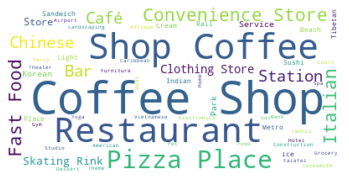

In [594]:

text=[]
for x in range(toronto.shape[0]):
    if(toronto.iloc[x,0]== 0):
        text.append(toronto.iloc[x,1])

text =','.join(text)
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#### This is representation is called **Word Cloud** . The more the frequency of a word repeated ,the bigger the word appears.
#### So, we can infer that the cluster 0 involves more Coffee Shop and Restaurants

In [595]:
# Defining a function for wordcloud
def wordcloud_(i):
    text=[]
    for x in range(toronto.shape[0]):
        if(toronto.iloc[x,0]== i):
            text.append(toronto.iloc[x,1])

    text =','.join(text)
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color='white').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


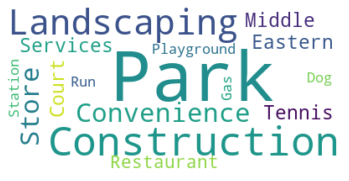

In [596]:
# cluster 1
wordcloud_(1)

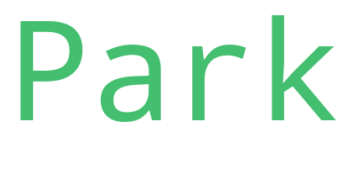

In [597]:
# cluster 1
wordcloud_(2)

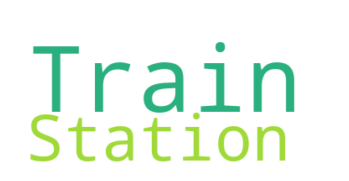

In [598]:
# cluster 1
wordcloud_(3)

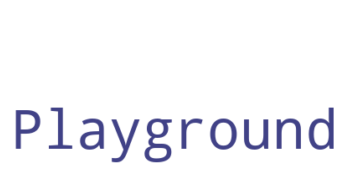

In [599]:
# cluster 1
wordcloud_(4)

The Cluster 0 need to be futher explored to get a clear understanding.